### Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| LIFESTAGE|	Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school. |
| PREMIUM_CUSTOMER|	Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options. |


We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

To get started, download the resource csv data files below and begin performing high level data checks such as:


- Creating and interpreting high level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. 

### Summary

1. Mainstream Customers has most sales.
2. Older singles and couples has highest sales.
3. Data for dates unavailable to track seasonal purchases.
4. Most purchases are done in 2 packets.
5. Older singles, families, retirees and young families for all 3 segments have higher spending at a glance.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df1 = pd.read_csv("QVI_transaction_data.csv")

In [3]:
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
df2 = pd.read_csv("QVI_purchase_behaviour.csv")

In [5]:
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [6]:
df = pd.merge(left=df1, right=df2, on="LYLTY_CARD_NBR", how='inner')

In [7]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [8]:
#df.to_csv("qvi.csv",index=False)

### Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [10]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [11]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [12]:
df["DATE"].nunique()

364

In [13]:
df["STORE_NBR"].nunique()

272

In [14]:
df["LYLTY_CARD_NBR"].nunique()

72637

In [15]:
df["TXN_ID"].nunique()

263127

In [16]:
df["PROD_NBR"].nunique()

114

In [17]:
df["PROD_NAME"].nunique()

114

In [18]:
df["PROD_QTY"].nunique()

6

In [19]:
df["LIFESTAGE"].nunique()

7

In [20]:
df["PREMIUM_CUSTOMER"].nunique()

3

In [21]:
df.groupby(by='DATE')['PROD_QTY','TOT_SALES'].sum()

,PROD_QTY,TOT_SALES
DATE,,
43282,1394,5372.2
43283,1367,5315.4
43284,1389,5321.8
43285,1373,5309.9
43286,1358,5080.9
...,...,...
43642,1380,5305.0
43643,1352,5202.8
43644,1400,5299.6


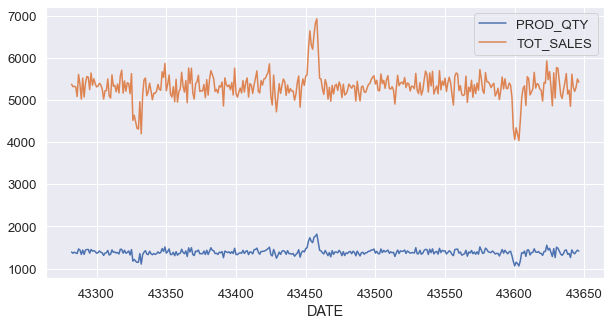

In [22]:
df.groupby(by='DATE')['PROD_QTY','TOT_SALES'].sum().plot(figsize=(10,5))
plt.show()

In [23]:
df.groupby(by='STORE_NBR')['PROD_QTY','TOT_SALES'].sum()

,PROD_QTY,TOT_SALES
STORE_NBR,,
1,704,2393.60
2,564,2005.80
3,2915,12802.45
4,3316,14647.65
5,2704,9500.80
...,...,...
268,732,2601.05
269,3191,11221.80
270,3235,11293.95


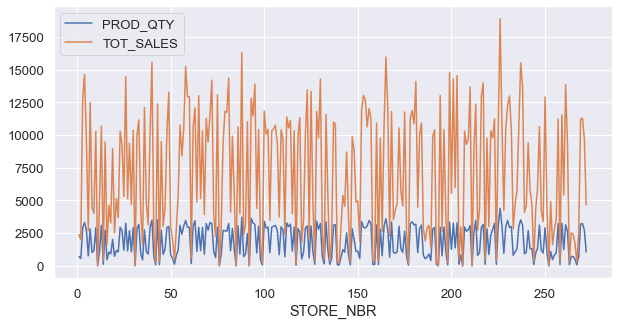

In [24]:
df.groupby(by='STORE_NBR')['PROD_QTY','TOT_SALES'].sum().plot(figsize=(10,5))
plt.show()

In [25]:
df.groupby(by='LYLTY_CARD_NBR')['PROD_QTY','TOT_SALES'].sum()

,PROD_QTY,TOT_SALES
LYLTY_CARD_NBR,,
1000,2,6.0
1002,1,2.7
1003,2,6.6
1004,1,1.9
1005,1,2.8
...,...,...
2370651,2,13.0
2370701,2,7.2
2370751,2,9.2


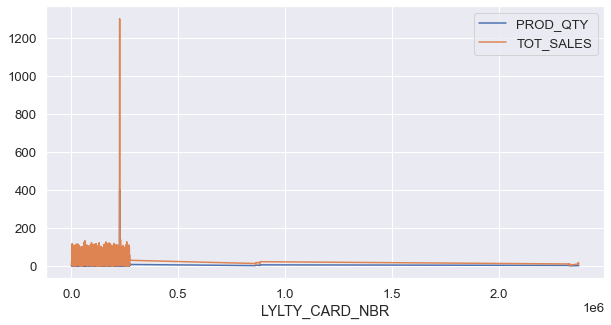

In [26]:
df.groupby(by='LYLTY_CARD_NBR')['PROD_QTY','TOT_SALES'].sum().plot(figsize=(10,5))
plt.show()

In [27]:
df.groupby(by='PROD_NBR')['PROD_QTY','TOT_SALES'].sum()

,PROD_QTY,TOT_SALES
PROD_NBR,,
1,2802,8125.8
2,6038,22944.4
3,6157,28308.4
4,6509,40352.0
5,2777,8331.0
...,...,...
110,2825,5367.5
111,3045,9135.0
112,6227,26149.2


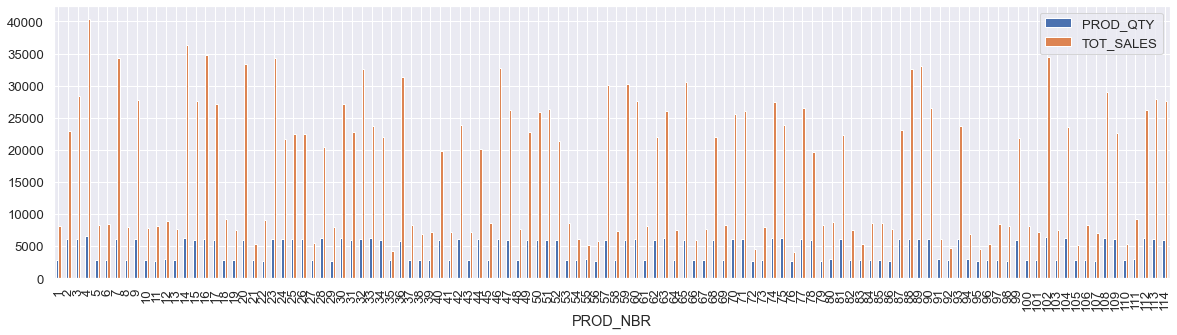

In [28]:
df.groupby(by='PROD_NBR')['PROD_QTY','TOT_SALES'].sum().plot(kind='bar',figsize=(20,5))
plt.show()

In [29]:
df.groupby(by='LIFESTAGE')['PROD_QTY','TOT_SALES'].sum()

,PROD_QTY,TOT_SALES
LIFESTAGE,,
MIDAGE SINGLES/COUPLES,47721,184751.30
NEW FAMILIES,12847,50433.45
OLDER FAMILIES,94992,353767.20
OLDER SINGLES/COUPLES,104203,402426.75
RETIREES,94166,366470.90
YOUNG FAMILIES,84561,316160.10
YOUNG SINGLES/COUPLES,66634,260405.30


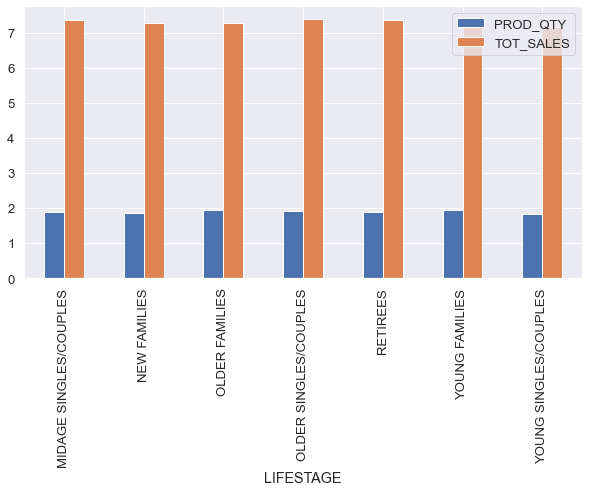

In [30]:
ax = df.groupby(by='LIFESTAGE')['PROD_QTY','TOT_SALES'].mean().plot.bar(legend=True, figsize=(10,5))
ax.set_title('')
ax.set_ylabel('')
plt.show()

In [31]:
df.groupby(by='PREMIUM_CUSTOMER')['PROD_QTY','TOT_SALES'].sum()

,PROD_QTY,TOT_SALES
PREMIUM_CUSTOMER,,
Budget,177898,676211.55
Mainstream,193965,750744.50
Premium,133261,507458.95


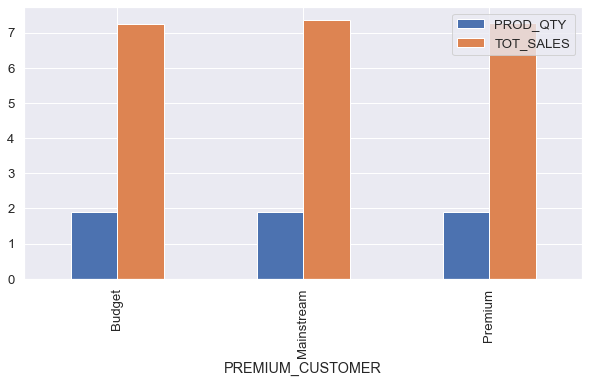

In [32]:
ax = df.groupby(by='PREMIUM_CUSTOMER')['PROD_QTY','TOT_SALES'].mean().plot.bar(legend=True, figsize=(10,5))
ax.set_title('')
ax.set_ylabel('')
plt.show()

### Data Visualization

### Univariate Data Exploration

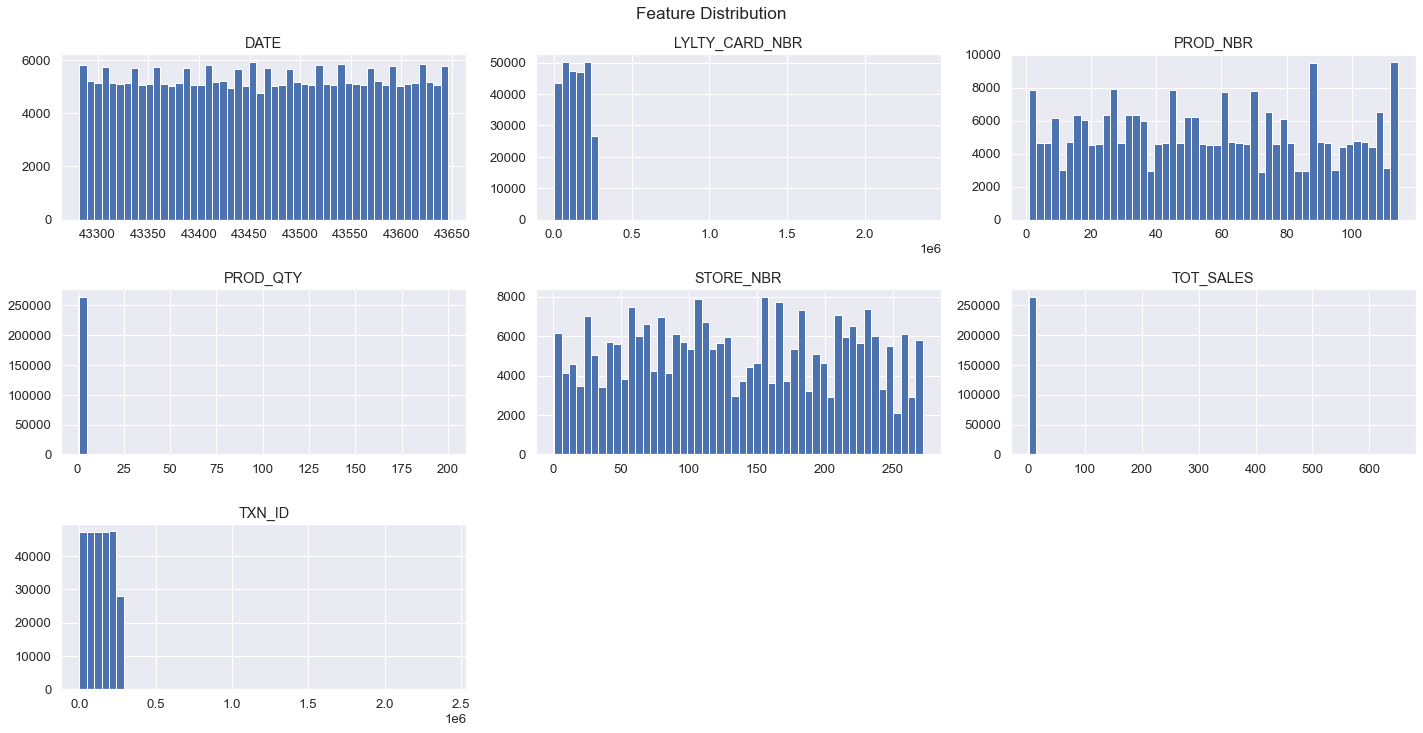

In [33]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

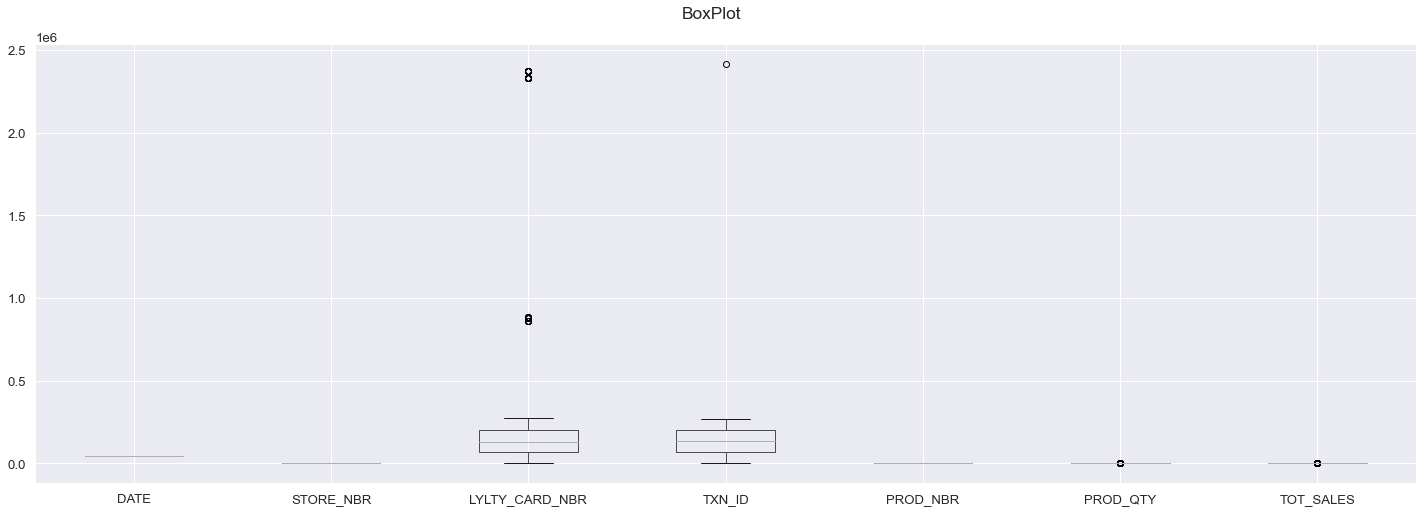

In [34]:
df.boxplot(figsize=(20,7))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [35]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


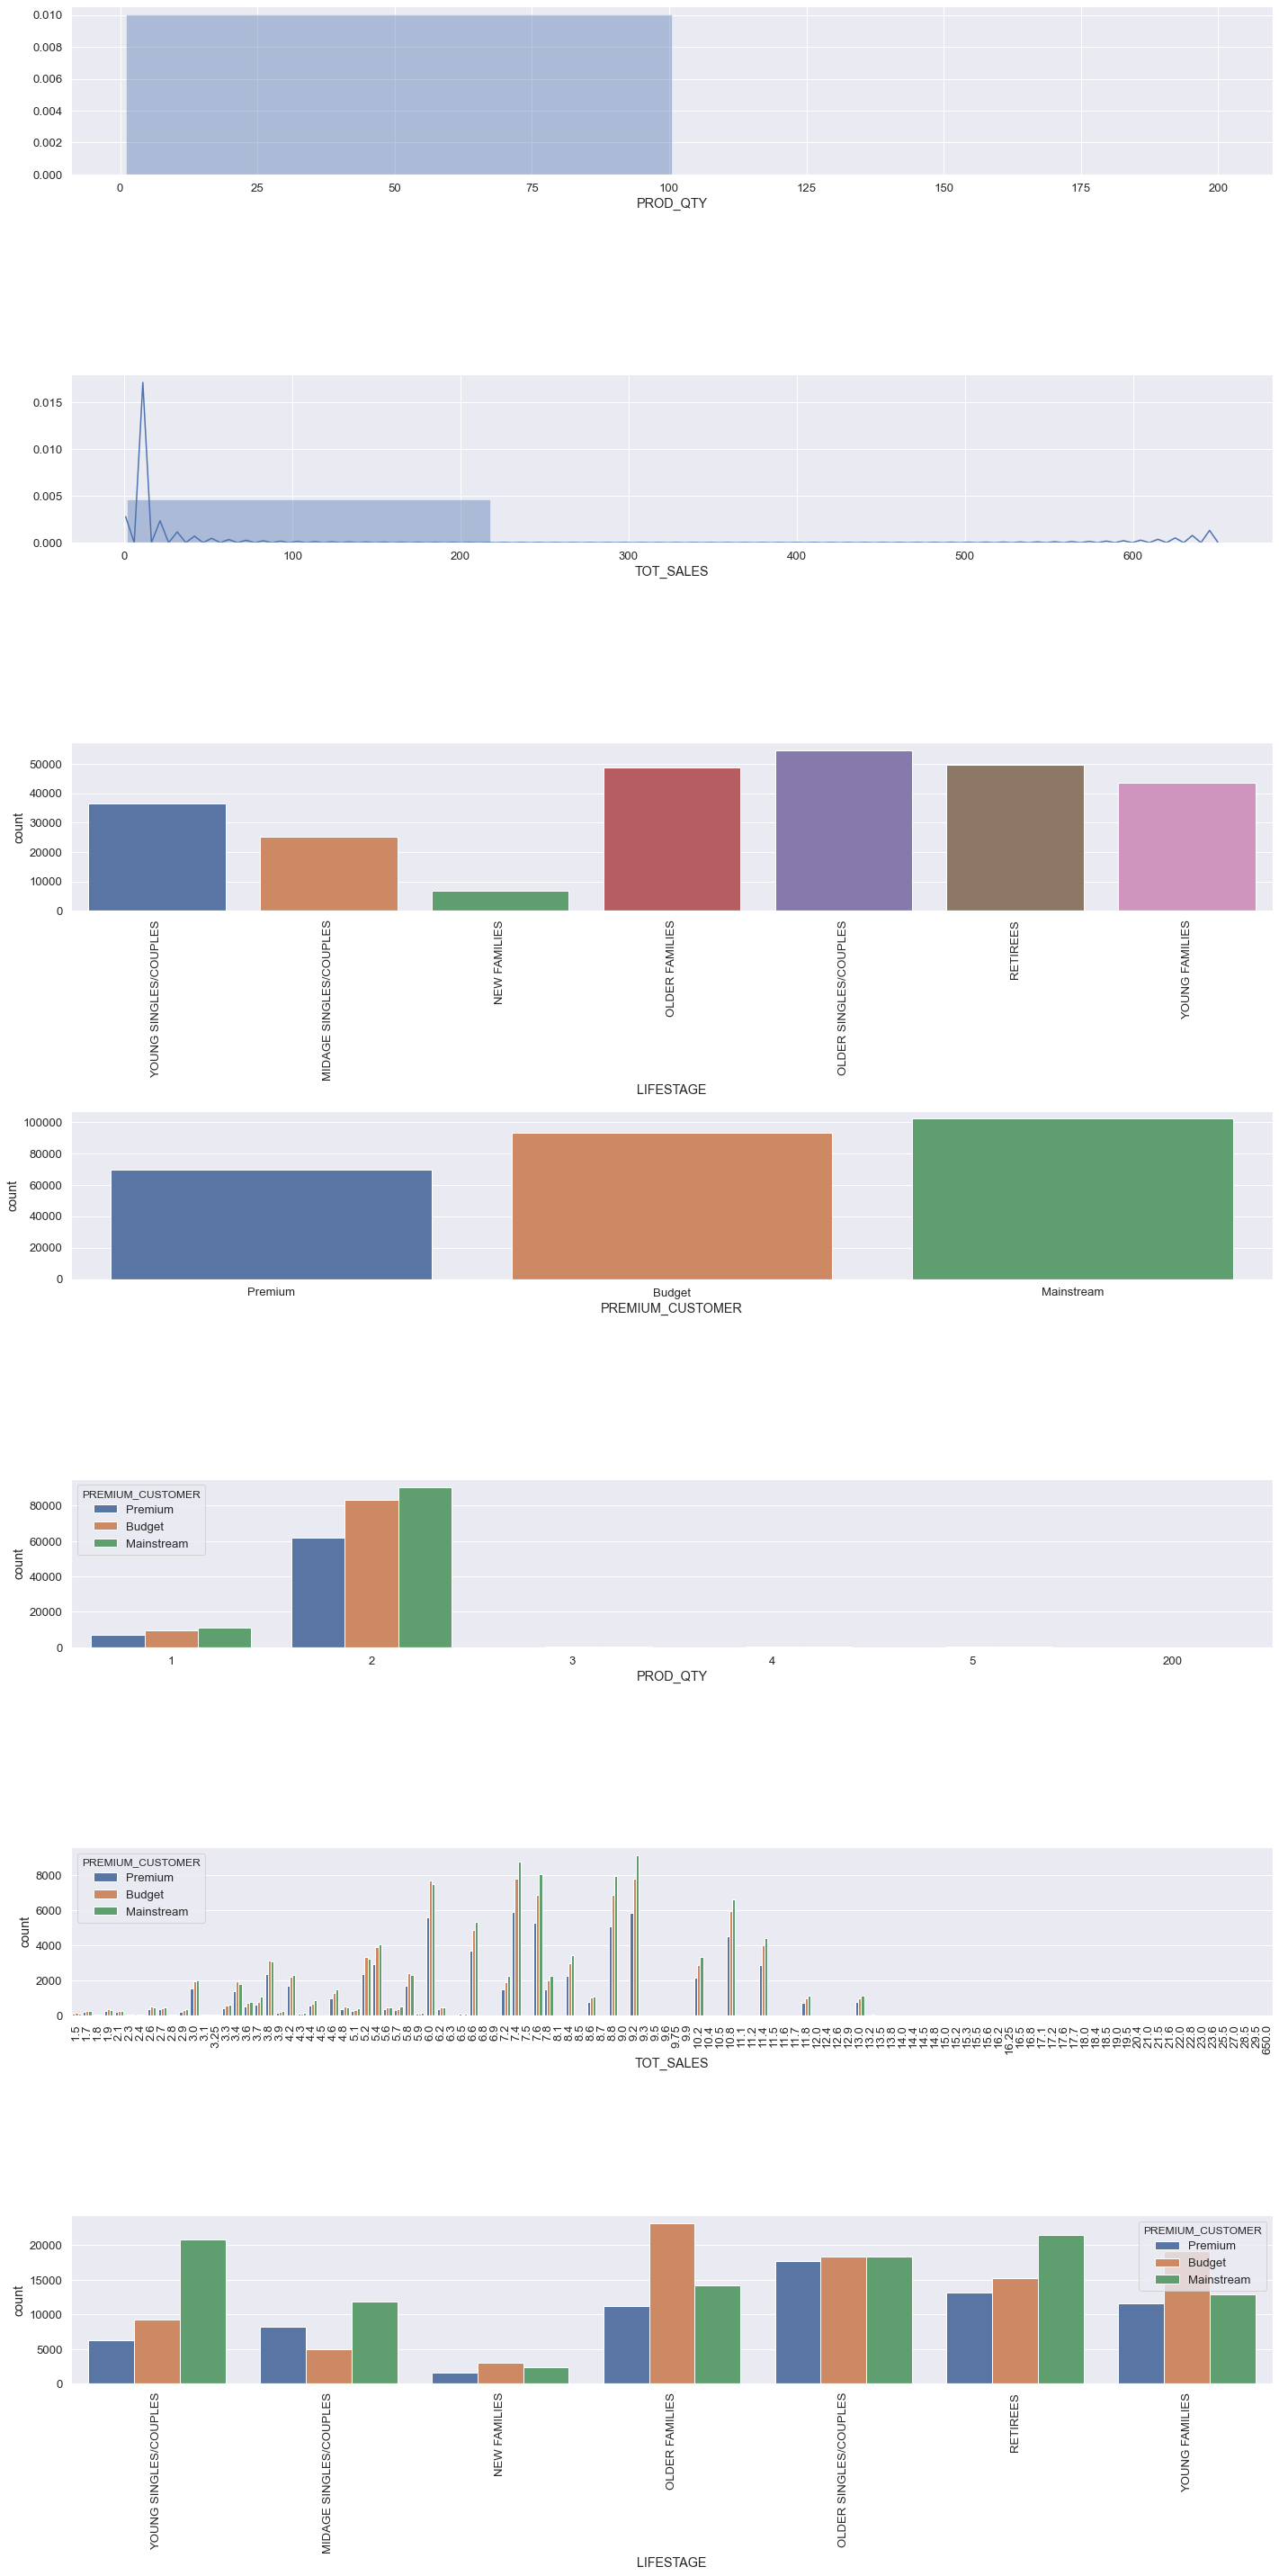

In [36]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
plt.title("")
sns.distplot(df.PROD_QTY, bins=2)

plt.subplot(7,1,2)
plt.title("")
sns.distplot(df.TOT_SALES, bins=3)

plt.subplot(7,1,3)
plt.title("")
plt.xticks(rotation=90)
sns.countplot(df.LIFESTAGE)

plt.subplot(7,1,4)
plt.title("")
sns.countplot(df.PREMIUM_CUSTOMER)

plt.subplot(7,1,5)
plt.title("")
sns.countplot(df.PROD_QTY, hue=df.PREMIUM_CUSTOMER)

plt.subplot(7,1,6)
plt.title("")
plt.xticks(rotation=90)
sns.countplot(df.TOT_SALES, hue=df.PREMIUM_CUSTOMER)

plt.subplot(7,1,7)
plt.title("")
plt.xticks(rotation=90)
sns.countplot(df.LIFESTAGE, hue=df.PREMIUM_CUSTOMER)

# plt.subplot(7,2,8)
# plt.title("")
# sns.countplot()


plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

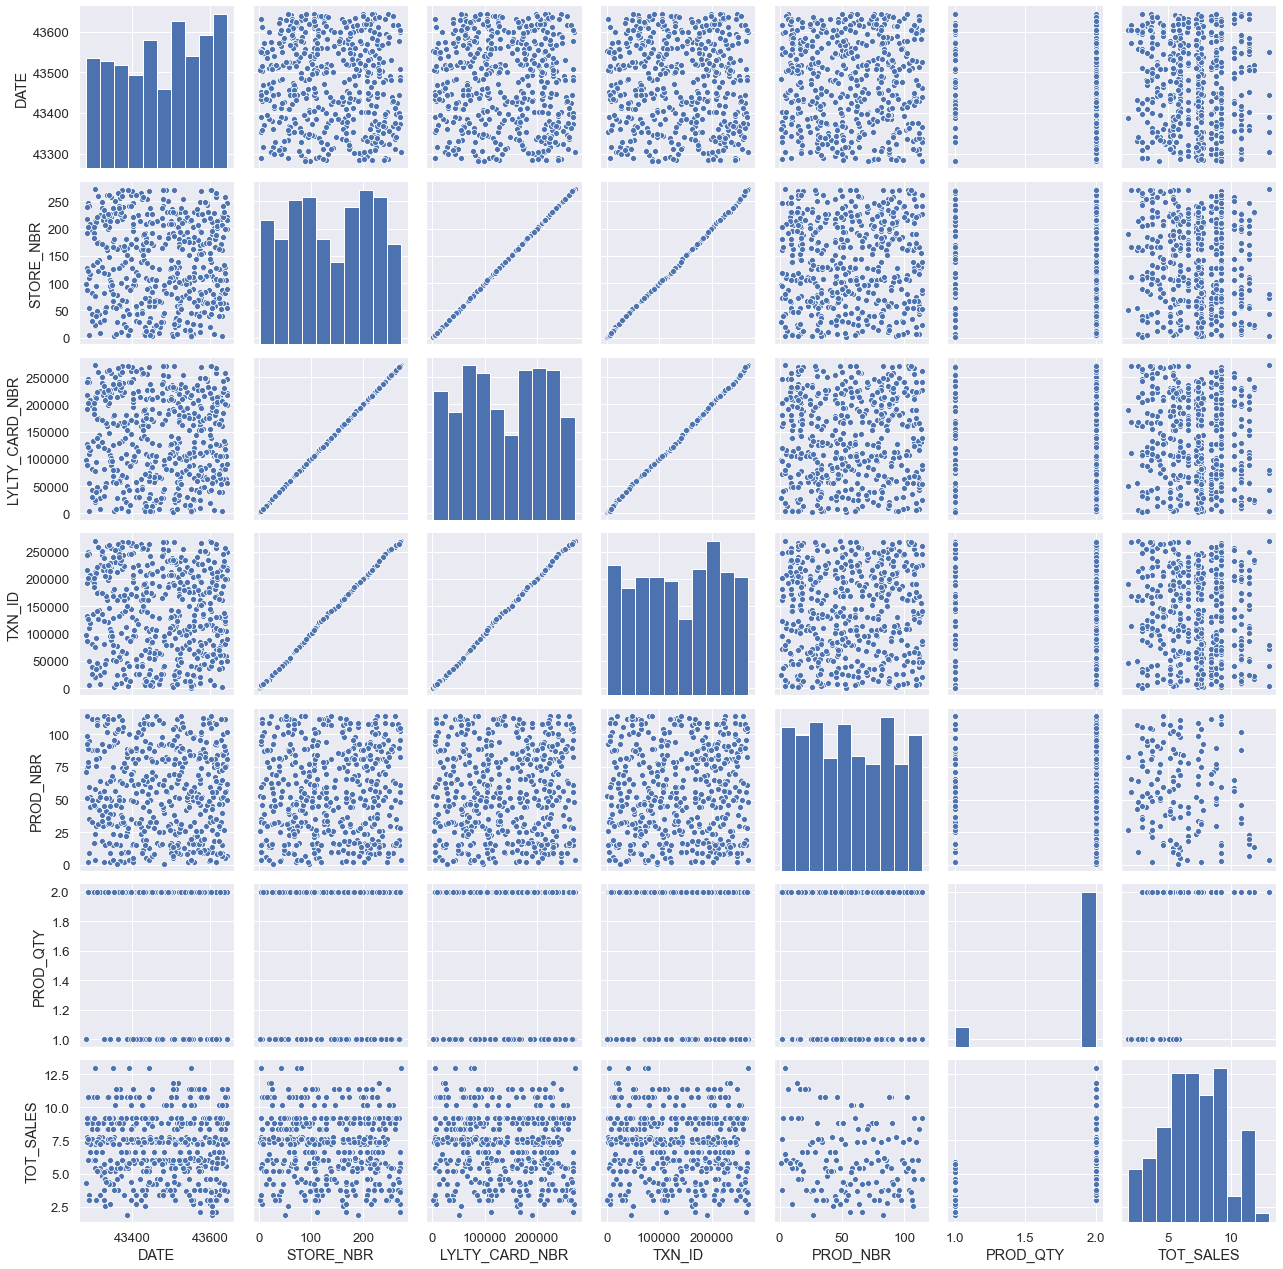

In [37]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df.sample(500))
plt.show()

### Correlation

In [38]:
df.corr()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
DATE,1.000000,0.001314,-0.000014,0.001171,-0.004276,-0.001265,-0.001681
STORE_NBR,0.001314,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234
LYLTY_CARD_NBR,-0.000014,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908
TXN_ID,0.001171,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468
PROD_NBR,-0.004276,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133851
PROD_QTY,-0.001265,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715307
TOT_SALES,-0.001681,0.003234,0.002908,0.003468,-0.133851,0.715307,1.000000


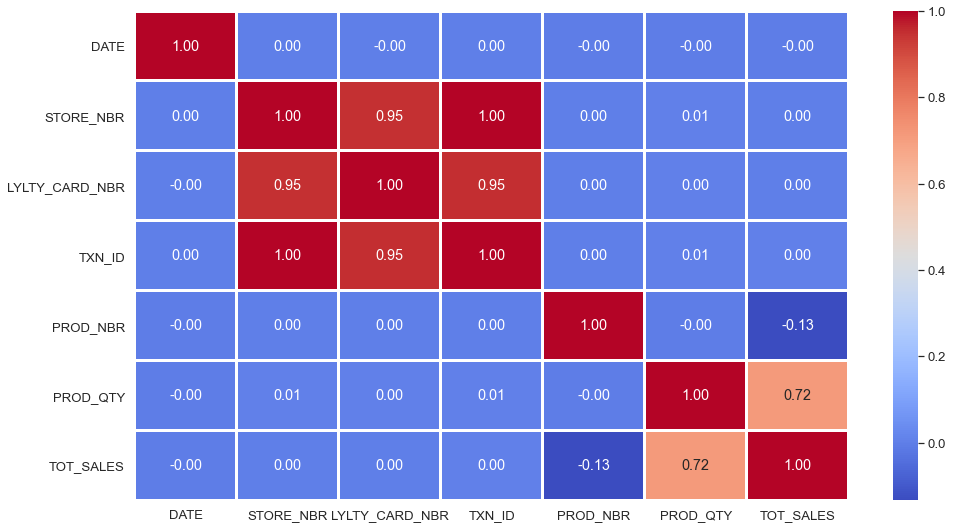

In [39]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()